In [1]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 감성 분석 모델 로드 (카카오 금융 감성 분석 모델)
MODEL_NAME = "snunlp/KR-FinBert-SC"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# 감성 분석 함수
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = ["부정", "중립", "긍정"]
    return sentiment_labels[torch.argmax(probs)]


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/406M [00:00<?, ?B/s]

In [2]:
# 뉴스 데이터 로드
df = pd.read_csv("C:/pthon_basic/webcrolingProject/news_crawler_project/data/cleaned_naver_news.csv")

# 감성 분석 실행 (본문 내용 분석)
df["감성 분석 결과"] = df["본문"].apply(get_sentiment)

# 분석 결과 저장
df.to_csv("C:/pthon_basic/webcrolingProject/news_crawler_project/data/sentiment_naver_news.csv", index=False)

# 감성 분석 결과 출력
print(df["감성 분석 결과"].value_counts())


감성 분석 결과
중립    35
부정     6
긍정     5
Name: count, dtype: int64


Matplotlib is building the font cache; this may take a moment.
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonS

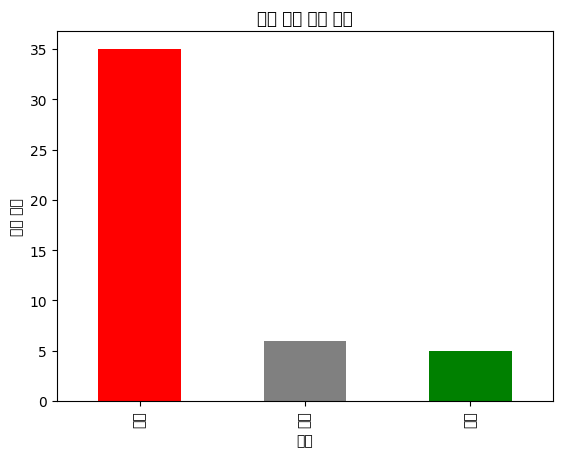

In [3]:
import matplotlib.pyplot as plt

# 감성 분석 결과 시각화
df["감성 분석 결과"].value_counts().plot(kind="bar", color=["red", "gray", "green"])
plt.title("뉴스 감성 분석 결과")
plt.xlabel("감성")
plt.ylabel("기사 개수")
plt.show()
